# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [50]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [51]:
from sklearn.datasets import load_boston
#loading the boston dataset
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [52]:
#summarizing and examining the data
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
#print(bdata.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


Text(0.5,1,'Histogram of Median value of Boston house prices')

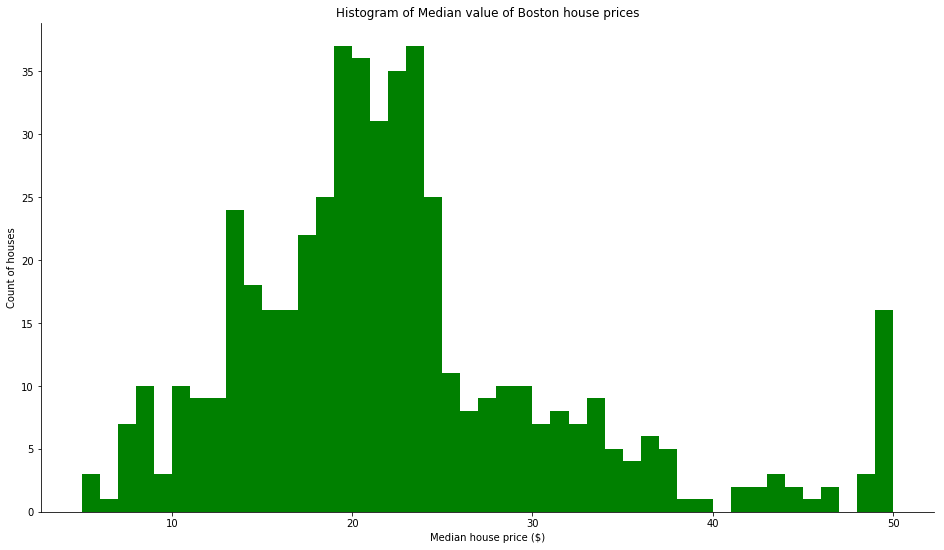

In [188]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
#set figure size
plt.figure(figsize=(16,9))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plot the histogram
plt.hist(bdata.target,color='green',bins=np.arange(min(bdata.target), max(bdata.target) + 1, 1))
plt.xlabel("Median house price ($)")
plt.ylabel("Count of houses")
plt.title('Histogram of Median value of Boston house prices')

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


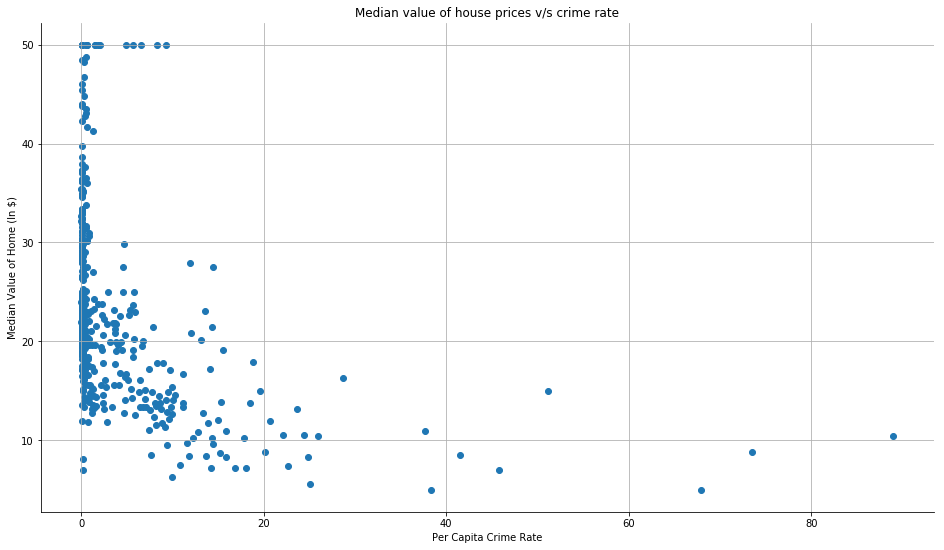

In [189]:
#set figure size
plt.figure(figsize=(16,9))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#create scatter plot
plt.scatter(x=bdata.data[:,0],y=bdata.target)
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Median Value of Home (In $)')
plt.title('Median value of house prices v/s crime rate')
plt.grid(True)

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Ans. I am trying to visualize the relationship between median value of house prices in Boston and percent lower status of the population. The data seems to show that the variables might have a negative correlation i.e that is places with greater proportion of lower staus of the population have lower median value of homes. But this relationship may not necessarily be causal. I have used the color blue to mark out data points in the set which have rooms>=6. The data indicates that the high status population areas seems to have a greater number of rooms in the house. This might indicate that the population which belows to the lower status might be living in houses with smaller number of rooms, leading to lower median house prices.

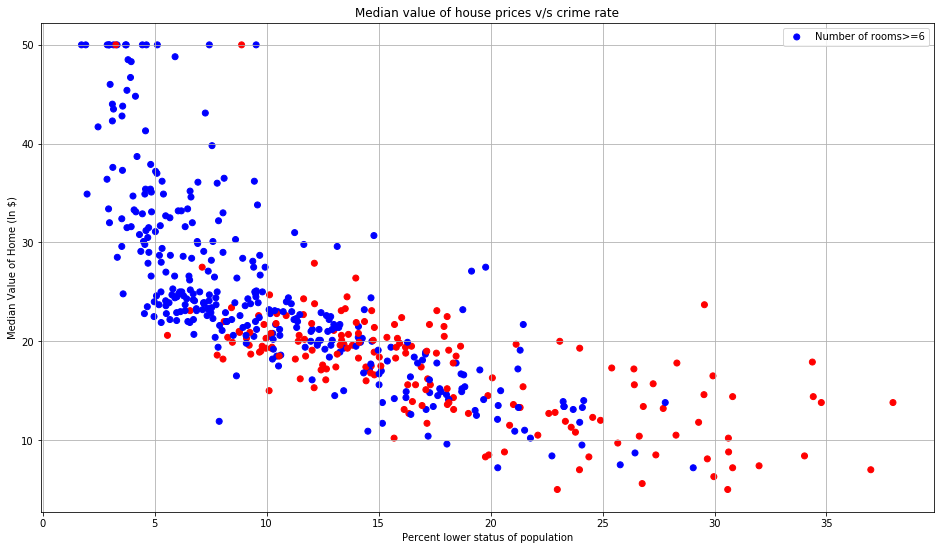

In [191]:
#set figure size
plt.figure(figsize=(16,9))
colr=['red' if i<=6 else 'blue' for i in bdata.data[:,5]]
#create scatter plot
plt.scatter(x=bdata.data[:,12],y=bdata.target,c=colr,label='Number of rooms>=6')
plt.xlabel('Percent lower status of population')
plt.ylabel('Median Value of Home (In $)')
plt.title('Median value of house prices v/s crime rate')
plt.legend()
plt.grid(True)

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [192]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    #find the difference between predictions and actual y values
    residuals=[predictions[i]-yvalues[i] for i in range(len(predictions))]
    #compute rmse
    rmse=np.sqrt(np.sum([x**2 for x in residuals])/len(residuals))
    return rmse
print(compute_rmse((2,2,3),(0,2,6)))

2.08166599947


In [193]:
#pushing the boston dataset into a dataframe for convenience of calculations
df_boston = pd.DataFrame(bdata.data,columns=bdata.feature_names)
df_boston['target'] = pd.Series(bdata.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [195]:
#set seed
np.random.seed(seed=13579)
#create list for shuffling data
lst=np.arange(len(df_boston))
#shuffle list
np.random.shuffle(lst)
#split data into train and test
bdata_train = df_boston.loc[lst[:int(0.66*504)+1,]]
bdata_test = df_boston.loc[lst[int(0.66*504)+1:,]]
print(len(bdata_train))
print(len(bdata_test))

333
173


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [197]:
#baseline model that predicts, for every observation x_i the median home value is the average of the median values for all instances in the training 
def baseline_model(x_i):
    #return mean of all median values of homes in training set 
    return np.mean(bdata_train.target)

#find predictions corresponding to training set
train_predictions=[baseline_model(xi) for xi in bdata_train]
#compute training rmse
rmse_train=compute_rmse(train_predictions, list(bdata_train.target))
#find predictions corresponding to test set
test_predictions=[baseline_model(xi) for xi in bdata_test]
#compute test rmse
rmse_test=compute_rmse(test_predictions, list(bdata_test.target))
print(rmse_train)
print(rmse_test)

11.637896479
16.1360024957


Ans. The RMSE for the testing set (16.1) is much higher than that on the training set(11.6). This was expected because apart from this being a very bad baseline model which returns the mean of the set for each input, this model returns the mean of the median values of the training set for every input of the test set as well. As the model has not been trained on this test set, it is highly likely that it will perform worse on this set.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [198]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
#Given two instances and a value for L, this function returns the L-Norm distance between them
def distance(x1, x2, L):
    #check if length of the instances are the same, if not, print error
    if len(x1)!=len(x2):
        print('length of vectors do not match')
    else:
       #compute the l norm distance between vectors 
       abs_diff_vector_L = [np.absolute(x1[i]-x2[i])**L for i in range(len(x1))]
       dist=np.power(np.sum(abs_diff_vector_L),(1/L))     
    return dist
print(distance((3,4),(6,8),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [202]:

"""
Function
--------
nneighbor

Given training data, test data, names of input features, and L runs the nearest neighbor algorithm on the train and test sets,
computes the predictions for the test set, and computes and returns the rmse value

Parameters
----------
bdata_train : dataframe
    training dataset

bdata_test : dataframe
    test dataset

ip_features : list
    list of features to use for computing nearest neighbors

L: int
    Value of L to use in computing distances
    
N : int 
    Number of neighbors to use. Default 1 in this case

Returns
-------
rmse : float
    The rmse of the test set predictions

Example
-------
>>> nneighbor(bdata_train,bdata_test,['CRIM','RM'], 2)
7.4500998945857324
"""
import time
def nneighbor(bdata_train,bdata_test,ip_features, L,N=1):
    start_time = time.time()
    #create empty list of median value predictions
    medv=[]
    #compute distances for every point in test set to every point in training
    for i,x in bdata_test.iterrows():
        #lists to store distances and corresponding median values for each training point
        dist=[]
        medianval=[]
        #iterate through each training point to compute distance
        for  j,y in bdata_train.iterrows():
            #compute distance between training and test point, store the distance and corresponding median price value
            curr_dist=distance(x[ip_features],y[ip_features],L)
            medianval.append(y[['target']])
            dist.append(curr_dist)
        #print('iteration ended')
        #parallel sort the distance and median value lists to get median value corresponding to closest point to test point
        dist1, medianval = (list(x) for x in zip(*sorted(zip(dist,medianval), key=lambda pair: pair[0])))
        #append the predicted median house price value to the median prices list
        medv.append(medianval[0].target) 
    #print(medv)    
    #compute test rmse
    rmse=compute_rmse(medv,list(bdata_test.target))
    print("Time taken: ",str(round(time.time() - start_time,2))," seconds")
    return rmse

#your additional code here
nneighbor(bdata_train,bdata_test,['CRIM','RM'], 2)

Time taken:  90.78  seconds


7.4500998945857324

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [63]:
"""
Function
--------
normalize

Given raw data dataframe, normalizes all the columns in the dataframe

Parameters
----------
raw_data : dataframe column
    Original data to normalize

Returns
-------
normalized_data : dataframe column
    Normalized data

Example
-------
>>> bdata_train1=bdata_train.apply(normalize,axis=1)
"""
def normalize(raw_data):
    #compute normalized value for each data point in column
    normalized_data=[(x-np.mean(raw_data))/np.std(raw_data) for x in raw_data]
    return normalized_data

#your additional code here
#apply normalization function to each column in train and test set
bdata_train1=bdata_train.apply(normalize,axis=1)
bdata_test1=bdata_test.apply(normalize,axis=1)
#run nearest neighbors algorithm on normalized data
nneighbor(bdata_train1,bdata_test1,['CRIM','RM'], 2)

Time taken:  65.73  seconds


0.056231562797538541

Ans. The RMSE value computed after normalization is significantly lower as compared to the value before normalization. This is because the nearest neighbors algorithm is affected by features having diffeent scales.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [27]:
#run nneighbor with Rad, Dis as features and L as 2
nneighbor(bdata_train1,bdata_test1,['RAD','DIS'], 2)

Time taken:  90.57  seconds


0.080584463432974651

In [28]:
#run nneighbor with Crim, Rm,Rad, Dis as features and L as 2
nneighbor(bdata_train1,bdata_test1,['CRIM','RM','RAD','DIS'], 2)

Time taken:  94.92  seconds


0.056194922333493047

In [29]:
#run nneighbor with Crim, Rm,Rad, Dis as features and L as 1
nneighbor(bdata_train1,bdata_test1,['CRIM','RM','RAD','DIS'], 1)

Time taken:  96.53  seconds


0.05628867470997418

Ans. The combination of the features - 'CRIM','RM','RAD','DIS' with L as 2 gave me the lowest RMSE of 0.056194. My observation is that adding more features to the model increases the running time of the algorithm. When i increased my number of features from 2-4, the running time of the algorithm increased by 4-6 seconds. Choice of L also does seem to affect the running time of the algorithm slightly.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [205]:
"""
Function
--------
k_fold_cross_val

Given training data, number of folds, L, input features list, the nearest neighbors function to use, and number of neighbors,
runs k-fold cross validation on the training dataset and returns the avg RMSE.

Parameters
----------
k : int
    number of folds

bdata_train : dataframe
    training dataset

ip_features : list
    list of features to use for computing nearest neighbors

L: int
    Value of L to use in computing distances
    
nnfunction : function
    function to use for cross validation (nneighbors or knn)
    
N : int 
    Number of neighbors to use. Default 1

Returns
-------
rmse : float
    The avg RMSE after cross validation

Example
-------
>>> avg_rmse=k_fold_cross_val(10,bdata_train1,['CRIM','RM'],2,nneighbor)
>>> print('Average RMSE: 'avg_rmse)
0.0664595023026
"""

def k_fold_cross_val(k,bdata_train1,ip_features,L,nnfunction,N=1):
    #randomly shuffle training data for cross validaton
    bdata_train1= bdata_train1.reindex(np.random.permutation(bdata_train1.index))
    #compute partition size
    partition_size=int(len(bdata_train)/k)
    #empty list for storing rmse values from each iteration
    rmse_vals=[]
    for i in range(k):
        #divide data into partitions i.e train, test for cross validation
        cross_valid_train_set=pd.concat([bdata_train1[:k],bdata_train1[partition_size*k:]])
        validation_set=bdata_train1[k:partition_size*k]
        #run knn/nneighbors function for the cross validation train,test set and get rmse
        rmse=nnfunction(cross_valid_train_set,validation_set,ip_features,L,N)
        #store rmse
        rmse_vals.append(rmse)
        #print('iteration ',i+1)
    #compute avg rmse resultng from k iterations
    avg_rmse=np.mean(rmse_vals)
    return avg_rmse
avg_rmse=k_fold_cross_val(10,bdata_train1,['CRIM','RM'],2,nneighbor)
print('Average RMSE: ',avg_rmse)

Time taken:  6.45  seconds
Time taken:  6.52  seconds
Time taken:  6.67  seconds
Time taken:  7.05  seconds
Time taken:  6.86  seconds
Time taken:  7.54  seconds
Time taken:  6.58  seconds
Time taken:  6.52  seconds
Time taken:  6.59  seconds
Time taken:  6.7  seconds
Average RMSE:  0.0758119129952


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [207]:
"""
Function
--------
knn

Given training data, test data, names of input features, L, and K runs the K nearest neighbor algorithm on the train and test sets,
computes the predictions for the test set, and computes and returns the test rmse value

Parameters
----------
bdata_train : dataframe
    training dataset

bdata_test : dataframe
    test dataset

ip_features : list
    list of features to use for computing nearest neighbors

L: int
    Value of L to use in computing distances
    
K : int 
    Number of neighbors to use.

Returns
-------
rmse : float
    The rmse of the test set predictions

Example
-------
>>> print(knn(bdata_train,bdata_test,['CRIM','RM'], 2,1))
7.4500998945857324
"""
def knn(bdata_train,bdata_test,ip_features, L, K):
    start_time = time.time()
    #create list for predicted median price values
    medv=[]
    #for each data point in test compute distances to each training poing and find k closest points
    for i,x in bdata_test.iterrows():
        #empty distance and median value lists to store distances between test and each training point
        dist=[]
        medianval=[]
        for  j,y in bdata_train.iterrows():
            #compute distance and store median price value for each training point
            curr_dist=distance(x[ip_features],y[ip_features],L)
            medianval.append(y[['target']])
            dist.append(curr_dist)
        #print('iteration ended')
        #sort median price values of training by distance to test point and compute mean price of k nearest points
        dist1, medianval = (list(x) for x in zip(*sorted(zip(dist,medianval), key=lambda pair: pair[0])))
        medv.append(np.mean(medianval[0:K])) 
    #print(medv) 
    #compute rmse
    rmse=compute_rmse(medv,list(bdata_test.target))
    print("Time taken: ",str(round(time.time() - start_time,2))," seconds")
    return rmse

#print(knn(bdata_train1,bdata_test1,['RAD','DIS'], 2,3))
#run 10 fold cross validation
start=time.time()
avg_rmse=k_fold_cross_val(10,bdata_train2,['CRIM','RM'],2,knn,3)
print('Running time of Algorithm: ',time.time()-start)
print('Average RMSE: ',avg_rmse)

Time taken:  6.67  seconds
Time taken:  6.68  seconds
Time taken:  6.89  seconds
Time taken:  7.14  seconds
Time taken:  6.98  seconds
Time taken:  6.94  seconds
Time taken:  6.98  seconds
Time taken:  7.74  seconds
Time taken:  7.21  seconds
Time taken:  6.5  seconds
Running time of Algorithm:  69.76070308685303
Average RMSE:  0.0789333616659


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [78]:
#list to store rmse for each value of K 
k_vals=[]
#find rmse for K in the range 1-25 using 10 old cross validation
for i in range(1,26):
    avg_rmse=k_fold_cross_val(10,bdata_train2,['CRIM','ZN','RM','AGE','DIS','TAX'],2,knn,i)
    k_vals.append(avg_rmse)
print(k_vals)

Time taken:  7.54  seconds
Time taken:  7.6  seconds
Time taken:  7.75  seconds
Time taken:  7.51  seconds
Time taken:  7.55  seconds
Time taken:  7.55  seconds
Time taken:  8.09  seconds
Time taken:  7.52  seconds
Time taken:  7.58  seconds
Time taken:  7.49  seconds
Time taken:  7.57  seconds
Time taken:  7.54  seconds
Time taken:  7.61  seconds
Time taken:  7.55  seconds
Time taken:  7.93  seconds
Time taken:  7.95  seconds
Time taken:  7.55  seconds
Time taken:  7.56  seconds
Time taken:  7.57  seconds
Time taken:  7.58  seconds
Time taken:  7.53  seconds
Time taken:  7.58  seconds
Time taken:  7.59  seconds
Time taken:  8.2  seconds
Time taken:  7.56  seconds
Time taken:  7.64  seconds
Time taken:  7.56  seconds
Time taken:  7.61  seconds
Time taken:  7.69  seconds
Time taken:  7.94  seconds
Time taken:  7.9  seconds
Time taken:  8.21  seconds
Time taken:  7.76  seconds
Time taken:  7.63  seconds
Time taken:  7.61  seconds
Time taken:  7.79  seconds
Time taken:  7.61  seconds
Time

My observation is that as we increase the k value from 1, the RMSE value starts dropping and reaches the minumum value at K=5. Then the RMSE increases steadily until k=12 and becomes almost constant post that.

A reasonable choice of K for this model would be 5 as it gives us the lowest RMSE.

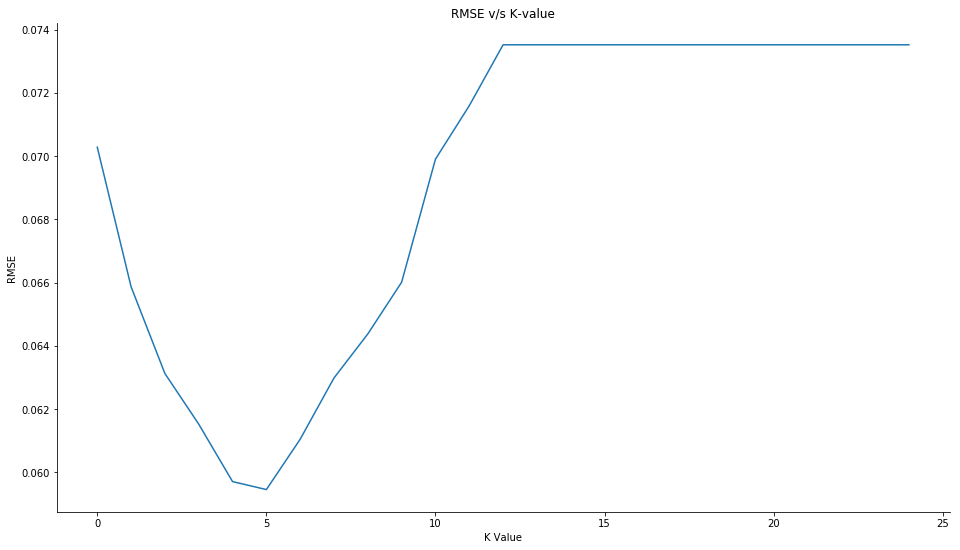

In [210]:
#set figure size
plt.figure(figsize=(16,9))
ax = plt.subplot(111)
#plot graph of RMSE v/s K value
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('RMSE v/s K-value')
plt.plot(k_vals)
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.show()